In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [36]:
# hand written dataset , having digits 0-9
mnist = tf.keras.datasets.mnist

In [37]:
(x_train_full, y_train_full), (x_test, y_test) =mnist.load_data()

In [38]:
x_train_full.shape # no. of images 60000 and one image 28*28 size

(60000, 28, 28)

In [39]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [40]:
x_train_full[5000] # perticular image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

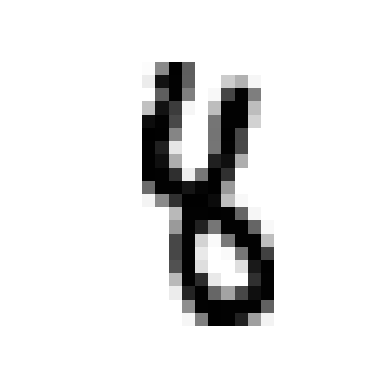

In [41]:
plt.imshow(x_train_full[7000], cmap = 'binary')
plt.axis("off")
plt.show()

<Axes: >

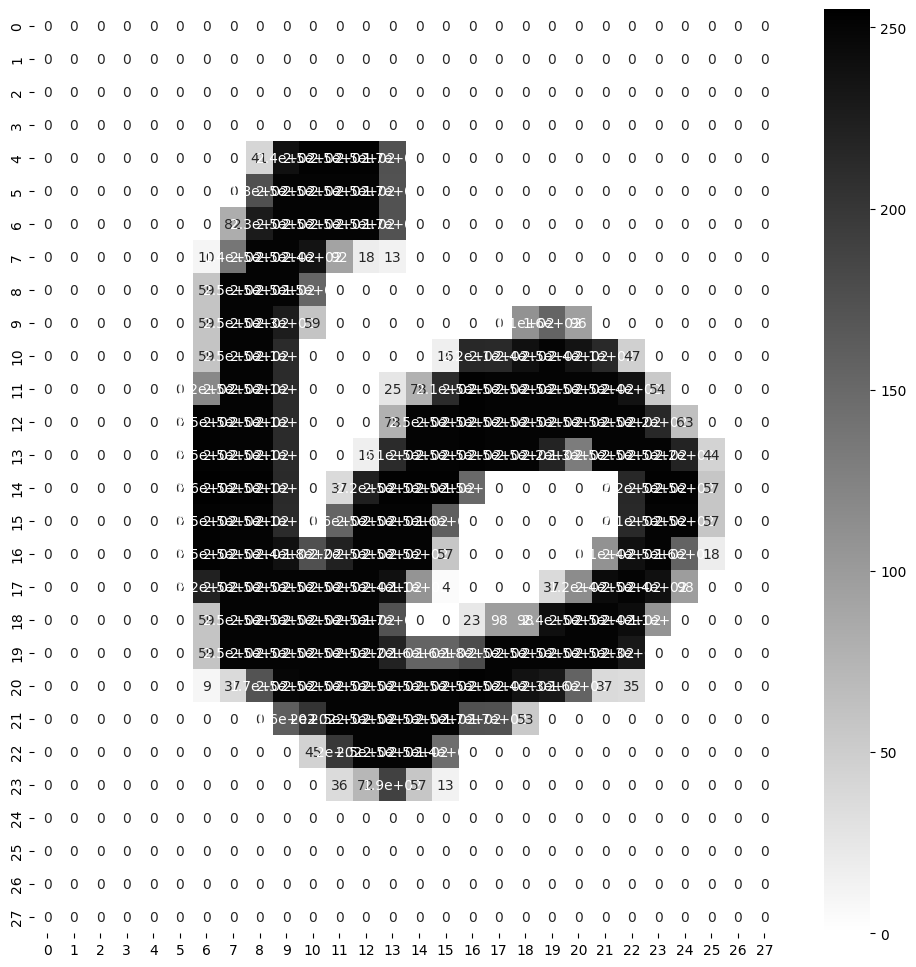

In [42]:
plt.figure(figsize = (12,12))
sns.heatmap(x_train_full[9000], annot = True, cmap = 'binary') # output as array

In [43]:
# Scale (unit scaling) the data between 0 to 1 by dividing it by 255, as its an unsigned data between 0-255 range
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
#0-255/255=[0,1]

In [44]:
x_test = x_test / 255.

In [45]:
print(x_valid.shape)
print(x_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

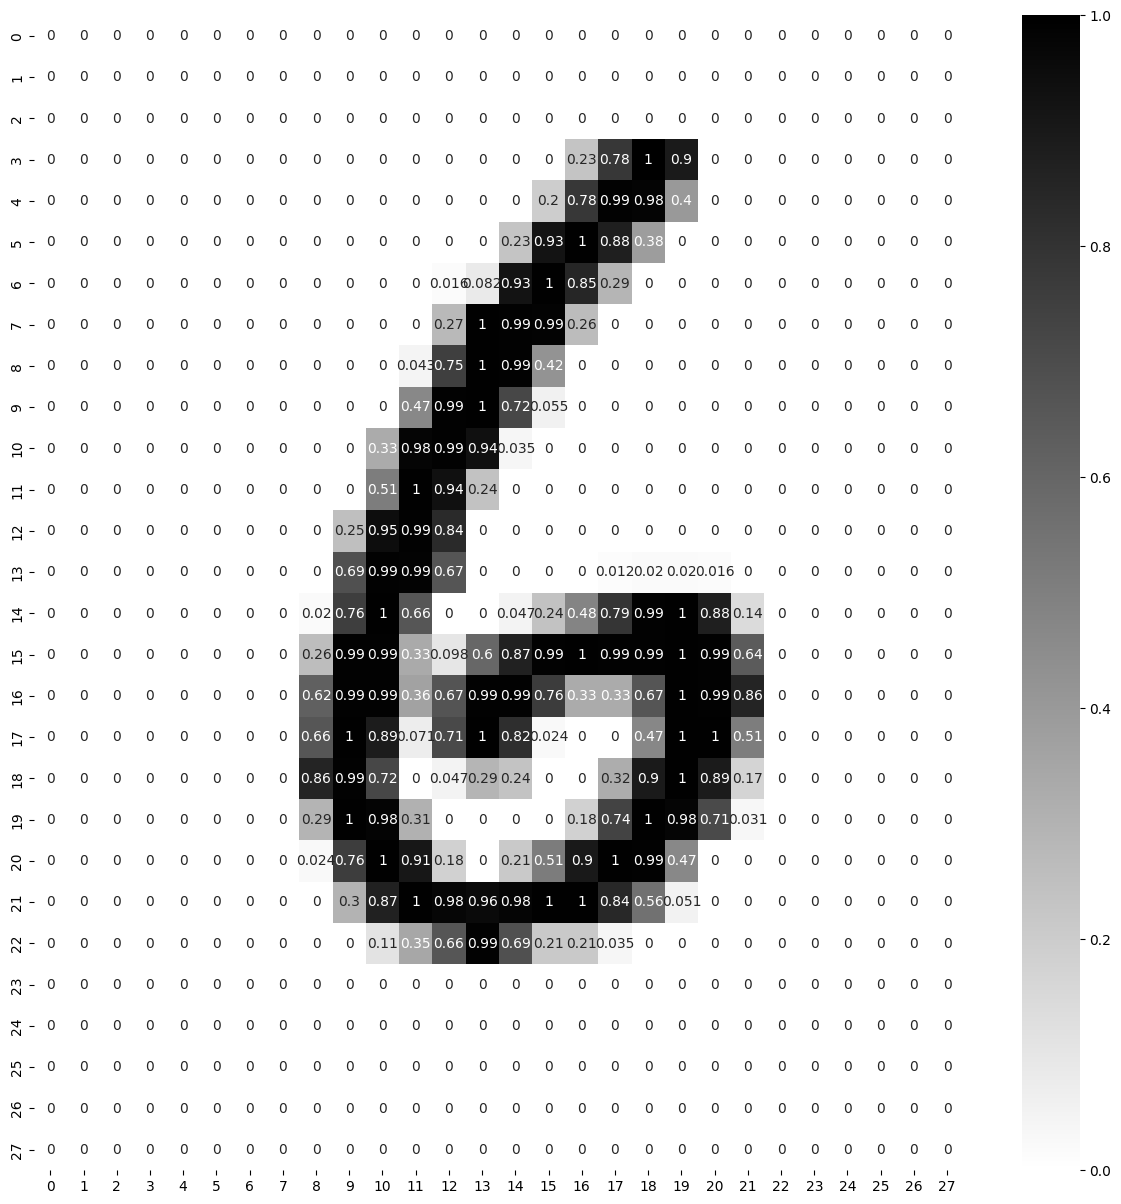

In [46]:
plt.figure(figsize = (15,15))
sns.heatmap(x_train[1000], annot = True, cmap = 'binary') # 888 output as array

In [47]:
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28], name = "inputlayers"),
          tf.keras.layers.Dense(300, activation = 'relu' , name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation = 'relu' , name = "hiddenlayer2"),
          tf.keras.layers.Dense(10, activation = 'softmax' , name = "outputlayer")]

In [48]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [49]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayers (Flatten)       (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]

In [51]:
model_clf.compile(loss = LOSS_FUNCTION , optimizer = OPTIMIZER, metrics = METRICS)

In [52]:
# model_clf.layers
model_clf.layers[1].name

'hiddenlayer1'

In [53]:
hidden1 = model_clf.layers[1]

In [55]:
# getting weight
weights,biases = hidden1.get_weights()


In [59]:
55000/32

1718.75

In [58]:
# train model
EPOCHS = 5
VALIDATION_SET = (x_valid,y_valid)
history = model_clf.fit(x_train,y_train, epochs =EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 12s 4ms/step - loss: 0.2088 - accuracy: 0.9373 - val_loss: 0.1014 - val_accuracy: 0.9698
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9732 - val_loss: 0.0832 - val_accuracy: 0.9742
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0588 - accuracy: 0.9812 - val_loss: 0.0783 - val_accuracy: 0.9748
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9855 - val_loss: 0.0682 - val_accuracy: 0.9804
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0812 - val_accuracy: 0.9792


In [67]:
# SAVE MODEL
import time
def savemodel_path(model_dir = "/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok = True)
  filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, filename)
  print(f"your model will be saved at the following location \n{model_path}")
  return model_path

In [68]:
model_clf.save(savemodel_path())

your model will be saved at the following location 
/content/SAVED_MODELS/Model_2023_10_30_05_58_01_.h5


In [70]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [71]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.208804,0.937327,0.101352,0.9698
1,0.087092,0.973200,0.083235,0.9742
2,0.058844,0.981164,0.078327,0.9748
3,0.044096,0.985509,0.068166,0.9804
4,0.034656,0.988855,0.081230,0.9792


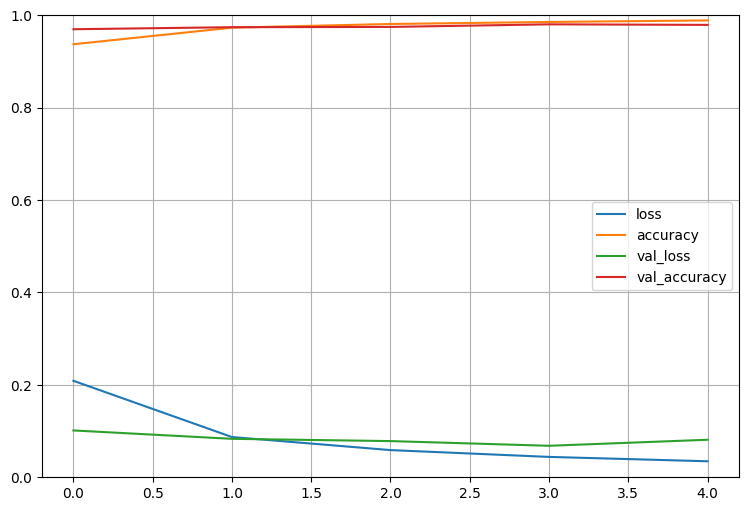

In [73]:
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [74]:
#accuracy on blind data
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9778


[0.08016575127840042, 0.9778000116348267]

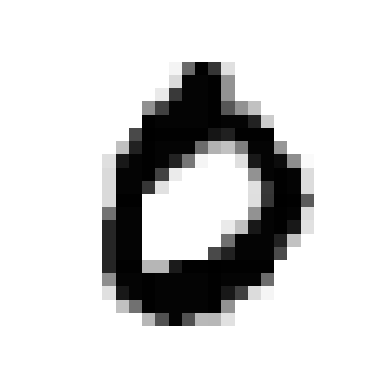

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [77]:
plt.imshow(x_test[3], cmap = 'binary')
plt.axis("off")
plt.show()
x_test[3]

In [76]:
x_test[3]   # single image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [78]:
model_clf.predict(x_test[:3]) #pass sequences

1/1 [==============================] - 0s 130ms/step


array([[3.1332647e-08, 1.1094321e-08, 4.7757555e-07, 6.3186184e-05,
        3.8605227e-11, 4.1037134e-09, 8.5192996e-13, 9.9993622e-01,
        2.4119114e-08, 9.6951744e-08],
       [3.0858374e-12, 3.4085892e-09, 1.0000000e+00, 2.9037168e-09,
        4.0372860e-15, 2.5361361e-14, 1.2172314e-15, 5.8202466e-12,
        2.8338352e-09, 1.5419691e-14],
       [3.6417262e-08, 9.9983263e-01, 1.1707610e-06, 5.8286819e-08,
        1.5060308e-06, 7.6261287e-08, 3.8491894e-08, 1.6227321e-04,
        2.1829519e-06, 7.3835359e-08]], dtype=float32)

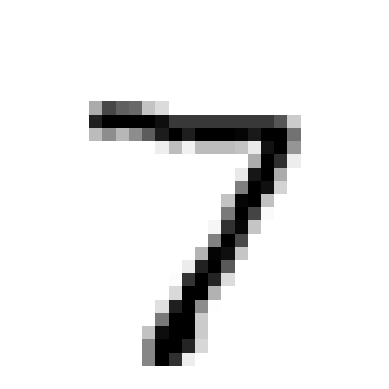

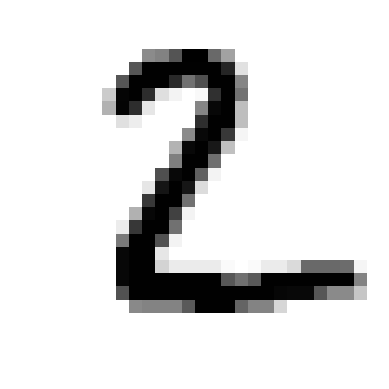

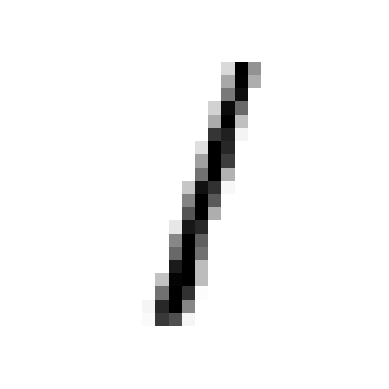

In [80]:
for i in range(0,3):
  plt.imshow(x_test[i], cmap = 'binary')
  plt.axis("off")
  plt.show()


In [81]:
prediction = model_clf.predict(x_test[:3])

1/1 [==============================] - 0s 20ms/step


In [82]:
prediction

array([[3.1332647e-08, 1.1094321e-08, 4.7757555e-07, 6.3186184e-05,
        3.8605227e-11, 4.1037134e-09, 8.5192996e-13, 9.9993622e-01,
        2.4119114e-08, 9.6951744e-08],
       [3.0858374e-12, 3.4085892e-09, 1.0000000e+00, 2.9037168e-09,
        4.0372860e-15, 2.5361361e-14, 1.2172314e-15, 5.8202466e-12,
        2.8338352e-09, 1.5419691e-14],
       [3.6417262e-08, 9.9983263e-01, 1.1707610e-06, 5.8286819e-08,
        1.5060308e-06, 7.6261287e-08, 3.8491894e-08, 1.6227321e-04,
        2.1829519e-06, 7.3835359e-08]], dtype=float32)

In [85]:
# probability of each clases here we choose high probability
y_prob = prediction[0]

In [89]:
# y_prob.round(2)
np.argmax(y_prob.round(2)) # argmax give index having max values

7

In [97]:
y_prob = prediction[1]

In [98]:
np.argmax(y_prob.round(2))

2

model give correct outputs

In [96]:
from tf.keras.models import load_model
model = load_model("/content/SAVED_MODELS/Model_2023_10_30_05_58_01_.h5")

ModuleNotFoundError: ignored